In [1]:
"""
Mounting to Drive
"""

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import sys, unicodedata
#!{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# NLTK Stop words
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 
                   'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 
                   'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
"""
ML Libraries
"""

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, TimeDistributed
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [4]:
"""
Contractions Dictionary
"""

def load_dict_contractions():
    
    return {
        "ain't":"is not",
        "amn't":"am not",
        "aren't":"are not",
        "can't":"cannot",
        "'cause":"because",
        "couldn't":"could not",
        "couldn't've":"could not have",
        "could've":"could have",
        "daren't":"dare not",
        "daresn't":"dare not",
        "dasn't":"dare not",
        "didn't":"did not",
        "doesn't":"does not",
        "don't":"do not",
        "e'er":"ever",
        "em":"them",
        "everyone's":"everyone is",
        "finna":"fixing to",
        "gimme":"give me",
        "gonna":"going to",
        "gon't":"go not",
        "gotta":"got to",
        "hadn't":"had not",
        "hasn't":"has not",
        "haven't":"have not",
        "he'd":"he would",
        "he'll":"he will",
        "he's":"he is",
        "he've":"he have",
        "how'd":"how would",
        "how'll":"how will",
        "how're":"how are",
        "how's":"how is",
        "I'd":"I would",
        "I'll":"I will",
        "I'm":"I am",
        "I'm'a":"I am about to",
        "I'm'o":"I am going to",
        "isn't":"is not",
        "it'd":"it would",
        "it'll":"it will",
        "it's":"it is",
        "I've":"I have",
        "kinda":"kind of",
        "let's":"let us",
        "mayn't":"may not",
        "may've":"may have",
        "mightn't":"might not",
        "might've":"might have",
        "mustn't":"must not",
        "mustn't've":"must not have",
        "must've":"must have",
        "needn't":"need not",
        "ne'er":"never",
        "o'":"of",
        "o'er":"over",
        "ol'":"old",
        "oughtn't":"ought not",
        "shalln't":"shall not",
        "shan't":"shall not",
        "she'd":"she would",
        "she'll":"she will",
        "she's":"she is",
        "shouldn't":"should not",
        "shouldn't've":"should not have",
        "should've":"should have",
        "somebody's":"somebody is",
        "someone's":"someone is",
        "something's":"something is",
        "that'd":"that would",
        "that'll":"that will",
        "that're":"that are",
        "that's":"that is",
        "there'd":"there would",
        "there'll":"there will",
        "there're":"there are",
        "there's":"there is",
        "these're":"these are",
        "they'd":"they would",
        "they'll":"they will",
        "they're":"they are",
        "they've":"they have",
        "this's":"this is",
        "those're":"those are",
        "'tis":"it is",
        "'twas":"it was",
        "wanna":"want to",
        "wasn't":"was not",
        "we'd":"we would",
        "we'd've":"we would have",
        "we'll":"we will",
        "we're":"we are",
        "weren't":"were not",
        "we've":"we have",
        "what'd":"what did",
        "what'll":"what will",
        "what're":"what are",
        "what's":"what is",
        "what've":"what have",
        "when's":"when is",
        "where'd":"where did",
        "where're":"where are",
        "where's":"where is",
        "where've":"where have",
        "which's":"which is",
        "who'd":"who would",
        "who'd've":"who would have",
        "who'll":"who will",
        "who're":"who are",
        "who's":"who is",
        "who've":"who have",
        "why'd":"why did",
        "why're":"why are",
        "why's":"why is",
        "won't":"will not",
        "wouldn't":"would not",
        "would've":"would have",
        "y'all":"you all",
        "you'd":"you would",
        "you'll":"you will",
        "you're":"you are",
        "you've":"you have",
        "Whatcha":"What are you",
        "luv":"love",
        "sux":"sucks"
        }

In [5]:
"""
Reading Data
"""

raw_dataset = pd.read_csv('drive/My Drive/twcs.csv')

In [6]:
"""
Data Set
"""

raw_dataset.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


In [7]:
"""
Inbound and Outbound
"""

inbound_data = list(raw_dataset[raw_dataset['inbound'] == True]['text'])
outbound_data = list(raw_dataset[raw_dataset['inbound'] == False]['text'])

In [8]:
"""
Raw Metrics
"""

print ('Shape of Data" {}'.format(raw_dataset.shape))

print ('Inbound Data Length: {}'.format(len(inbound_data)))
print ('Outbound Data Length: {}'.format(len(outbound_data)))

authors = set(raw_dataset['author_id'])
print ("Distinct Authors: {}".format(len(authors)))

Shape of Data" (2811774, 7)
Inbound Data Length: 1537843
Outbound Data Length: 1273931
Distinct Authors: 702777


In [9]:
"""
Sample Data
"""

tweets = inbound_data

sample_data = False
if sample_data:
  tweets = tweets[0:100000]

In [10]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = re.sub(r"http\S+", "", sent) # remove urls
        sent = re.sub(r"@\S+", "", sent) # remove references
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

data_words = list(sent_to_words(tweets))

In [13]:
# Build the bigram and trigram models

def create_multigram_model(data_words):

  bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
  trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
  bigram_mod = gensim.models.phrases.Phraser(bigram)
  trigram_mod = gensim.models.phrases.Phraser(trigram)

  def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
      """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
      texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
      texts = [bigram_mod[doc] for doc in texts]
      texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
      texts_out = []
      nlp = spacy.load('en', disable=['parser', 'ner'])
      for sent in texts:
          doc = nlp(" ".join(sent)) 
          texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
      # remove stopwords once more after lemmatization
      texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
      return texts_out

  data_ready = process_words(data_words)  # processed Text Data!

  return data_ready

data_words_pred = create_multigram_model(data_words)

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [16]:
"""
Additional Cleaning Steps
"""

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def remove_small_words(words):
    """Remove words with length less than 4 alphabets"""
    new_words = []
    for word in words:
      if len(word) < 3:
        pass
      else:
        new_words.append(word)
    return new_words

contractions_dict = load_dict_contractions()
def remove_contractions(words):
    """Remove contractions"""
    new_words = []
    for word in words:
        word = word.replace("’","'")
        if word in contractions_dict.keys():
            word = contractions_dict[word]
        else:
            pass
        new_words.append(word)
    return new_words     

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words


In [17]:
def normalize_text(tokenized_text):

  final_doc = [] 
  def normalizing(text):
      tokenized_text = remove_small_words(text)
      tokenized_text = remove_non_ascii(tokenized_text)
      tokenized_text = to_lowercase(tokenized_text)
      tokenized_text = remove_punctuation(tokenized_text)
      tokenized_text = remove_contractions(tokenized_text)

      return tokenized_text
      
  for text in tokenized_text:
      normalized_text = normalizing(text)
      final_doc.append(normalized_text)

  return final_doc    

final_doc_pred = normalize_text(data_words_pred)  

In [18]:
"""
Clear Ram
"""

del (data_words)
del (data_words_pred)

Training Data - Labelled Twitter Data

In [19]:
"""
Processing Labelled Data
"""

labelled_tweets = pd.read_csv('drive/My Drive/labeled_tweet.csv')

In [31]:
"""
Positive and Negative Tweets
"""

sample = True

pos_tweet = list(labelled_tweets[labelled_tweets['sentiment'] == 4]['tweet'])
neg_tweet = list(labelled_tweets[labelled_tweets['sentiment'] == 0]['tweet'])

no_of_samples = 100000
if sample:
  pos_tweet = pos_tweet[0:no_of_samples]
  neg_tweet = neg_tweet[0:no_of_samples]

  labels = list(labelled_tweets[labelled_tweets['sentiment'] == 4]['sentiment'])[0:no_of_samples] + list(labelled_tweets[labelled_tweets['sentiment'] == 0]['sentiment'])[0:no_of_samples]

print ('Number of Positive Tweets: {}'.format(len(pos_tweet)))
print ('Number of Negative Tweets: {}'.format(len(neg_tweet)))  

Number of Positive Tweets: 100000
Number of Negative Tweets: 100000


In [32]:
"""
Calling Functions
"""

all_labelled_tweets = pos_tweet + neg_tweet

# Final Data (Cleaned Version)
tokenized_data = list(sent_to_words(all_labelled_tweets))
data_words_train = create_multigram_model(tokenized_data)
final_doc_train = normalize_text(data_words_train)  

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [46]:
copy_of_data = final_doc_train.copy()
Y = []

final_doc_train = []
for index, text in enumerate(copy_of_data):

  if len(text)!=0:
    final_doc_train.append(text)
    Y.append(index)
  else:
    pass      

Deep Learning Approach - LSTM

In [ ]:
"""
Maximum Length
"""

max_seq_length = 0

for text in final_doc_train:
  if len(text) > max_seq_length:
    max_seq_length = len(text)

print ('Max Sequence Lenght is {}'.format(max_seq_length))    

Max Sequence Lenght is 22


In [ ]:
"""
Preparing Data for Modelling
"""

final_corpus = []
for text in final_doc_train:
  final_corpus.append(' '.join(text))

max_features = 50000
MAX_SEQUENCE_LENGTH = max_seq_length
tokenizer = Tokenizer(num_words=max_fatures, 
                      split=' ')

tokenizer.fit_on_texts(final_corpus)
word_index = tokenizer.word_index

X = tokenizer.texts_to_sequences(final_corpus)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)

Y = labels
  

In [ ]:
"""
Test Train and Validation Split
"""

X_interm, X_test, Y_interm, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_interm,Y_interm, test_size = 0.20, random_state = 42)
print(X_train.shape,len(Y_train))
print(X_test.shape,len(Y_test))
print (X_valid.shape, len(Y_valid))

(128000, 22) 128000
(40000, 22) 40000
(32000, 22) 32000


In [ ]:
"""
Model
"""

EMBEDDING_DIM = 100

def model_1():
  model = Sequential()
  model.add(Embedding(max_features, EMBEDDING_DIM, input_length=X.shape[1]))
  model.add(SpatialDropout1D(0.2))
  model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
  model.add(Dense(1, activation='sigmoid'))
  print (model.summary())
  return model

In [ ]:
"""
Model
"""

EMBEDDING_DIM = 200

def model_2():
  model = Sequential()
  model.add(Embedding(max_features, EMBEDDING_DIM, input_length=X.shape[1]))
  model.add(SpatialDropout1D(0.2))
  model.add(LSTM(200, dropout=0.2, return_sequences=True))
  model.add(LSTM(100, dropout=0.2, return_sequences=True))
  model.add(LSTM(50, dropout=0.2, return_sequences=False))
  model.add(Dense(1, activation='sigmoid'))
  print (model.summary())
  return model

In [ ]:
"""
Run Model
"""

model = model_1()
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

learning_rate = 0.005
epochs = 100
batch_size = 128

history = model.fit(X_train, 
                    Y_train, 
                    epochs=epochs, 
                    batch_size=batch_size,
                    validation_data=(X_valid, Y_valid),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0001)])


Logistic Regression

In [47]:
"""
Test Train and Validation Split
"""

X = []
for text in final_doc_train:
  X.append(' '.join(text))

X_interm, X_test, Y_interm, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_interm,Y_interm, test_size = 0.20, random_state = 42)
print(len(X_train),len(Y_train))
print(len(X_test),len(Y_test))
print (len(X_valid), len(Y_valid))

117097 117097
36594 36594
29275 29275


In [48]:
"""
Vectorization
"""

vect = TfidfVectorizer(strip_accents='unicode', 
                      ngram_range=(1, 3), 
                      max_df=0.9, 
                      min_df=3, 
                      sublinear_tf=True)

tfidf_train = vect.fit_transform(X_train)
tfidf_valid = vect.transform(X_valid)
tfidf_test = vect.transform(X_test)

In [ ]:
"""
Logistic Regression
"""

model = LogisticRegression(C=1, dual=False)
model.fit(tfidf_train, Y_train)

preds = model.predict(tfidf_valid)
accuracy_valid = (preds==Y_valid).mean()

preds = model.predict(tfidf_test)
accuracy_test = (preds==Y_test).mean()

preds = model.predict(tfidf_train)
accuracy_train = (preds==Y_train).mean()

print ('Validation Accuarcy: {}'.format(accuracy_valid))
print ('Training Accuarcy: {}'.format(accuracy_test))
print ('Testing Accuarcy: {}'.format(accuracy_train))

In [25]:
"""
Final Prediction
"""

prediction_data = []
for text in final_doc_pred:
  prediction_data.append(' '.join(text))

tfidf_predict = vect.transform(prediction_data)

preds = model.predict(tfidf_predict)

In [26]:
"""
Prediction Frame
"""

prediction_frame = pd.DataFrame()

inbound_tweet_id = list(raw_dataset[raw_dataset['inbound'] == True]['tweet_id'])

prediction_frame['tweet_id'] = inbound_tweet_id
prediction_frame['tweet_text'] = inbound_data
prediction_frame['processed_text'] = prediction_data
prediction_frame['sentiment'] = preds

prediction_frame.head()

,tweet_id,tweet_text,processed_text,sentiment
0,2,@sprintcare and how do you propose we do that,propose,4
1,3,@sprintcare I have sent several private messag...,send several private message respond usual,4
2,5,@sprintcare I did.,,4
3,8,@sprintcare is the worst customer service,bad customer service,0
4,12,@sprintcare You gonna magically change your co...,magically change connectivity whole family,4


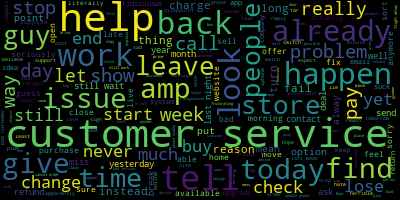

In [29]:
"""
Filtering Data
"""

neg_sentiment = list(prediction_frame[prediction_frame['sentiment'] == 0]['processed_text'])
pos_sentiment = list(prediction_frame[prediction_frame['sentiment'] == 4]['processed_text'])

from wordcloud import WordCloud

neg_string = ','.join(neg_sentiment)  

wordcloud = WordCloud(background_color="black", 
                      max_words=5000, 
                      contour_width=3, 
                      contour_color='steelblue')
wordcloud.generate(neg_string)

wordcloud.to_image()

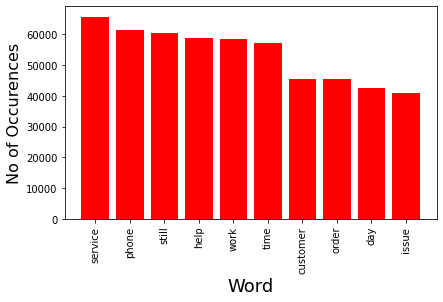

In [30]:
"""
Most Frequent Words
"""

from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt

def get_top_n_words(corpus, n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    """

    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

freq_words = get_top_n_words(neg_sentiment, 10)

word = []
frequency = []
for i in range(len(freq_words)):
  word.append(freq_words[i][0])
  frequency.append(freq_words[i][1])

indices = np.arange(len(freq_words))
plt.bar(indices, frequency, color='r')
plt.xticks(indices, word, rotation='vertical')
plt.tight_layout()
plt.xlabel('Word', fontsize=18)
plt.ylabel('No of Occurences', fontsize=16)
plt.show()